In [1]:
from PIL import Image
import numpy as np
import pandas as pd
from queue import Queue

ImportError: No module named queue

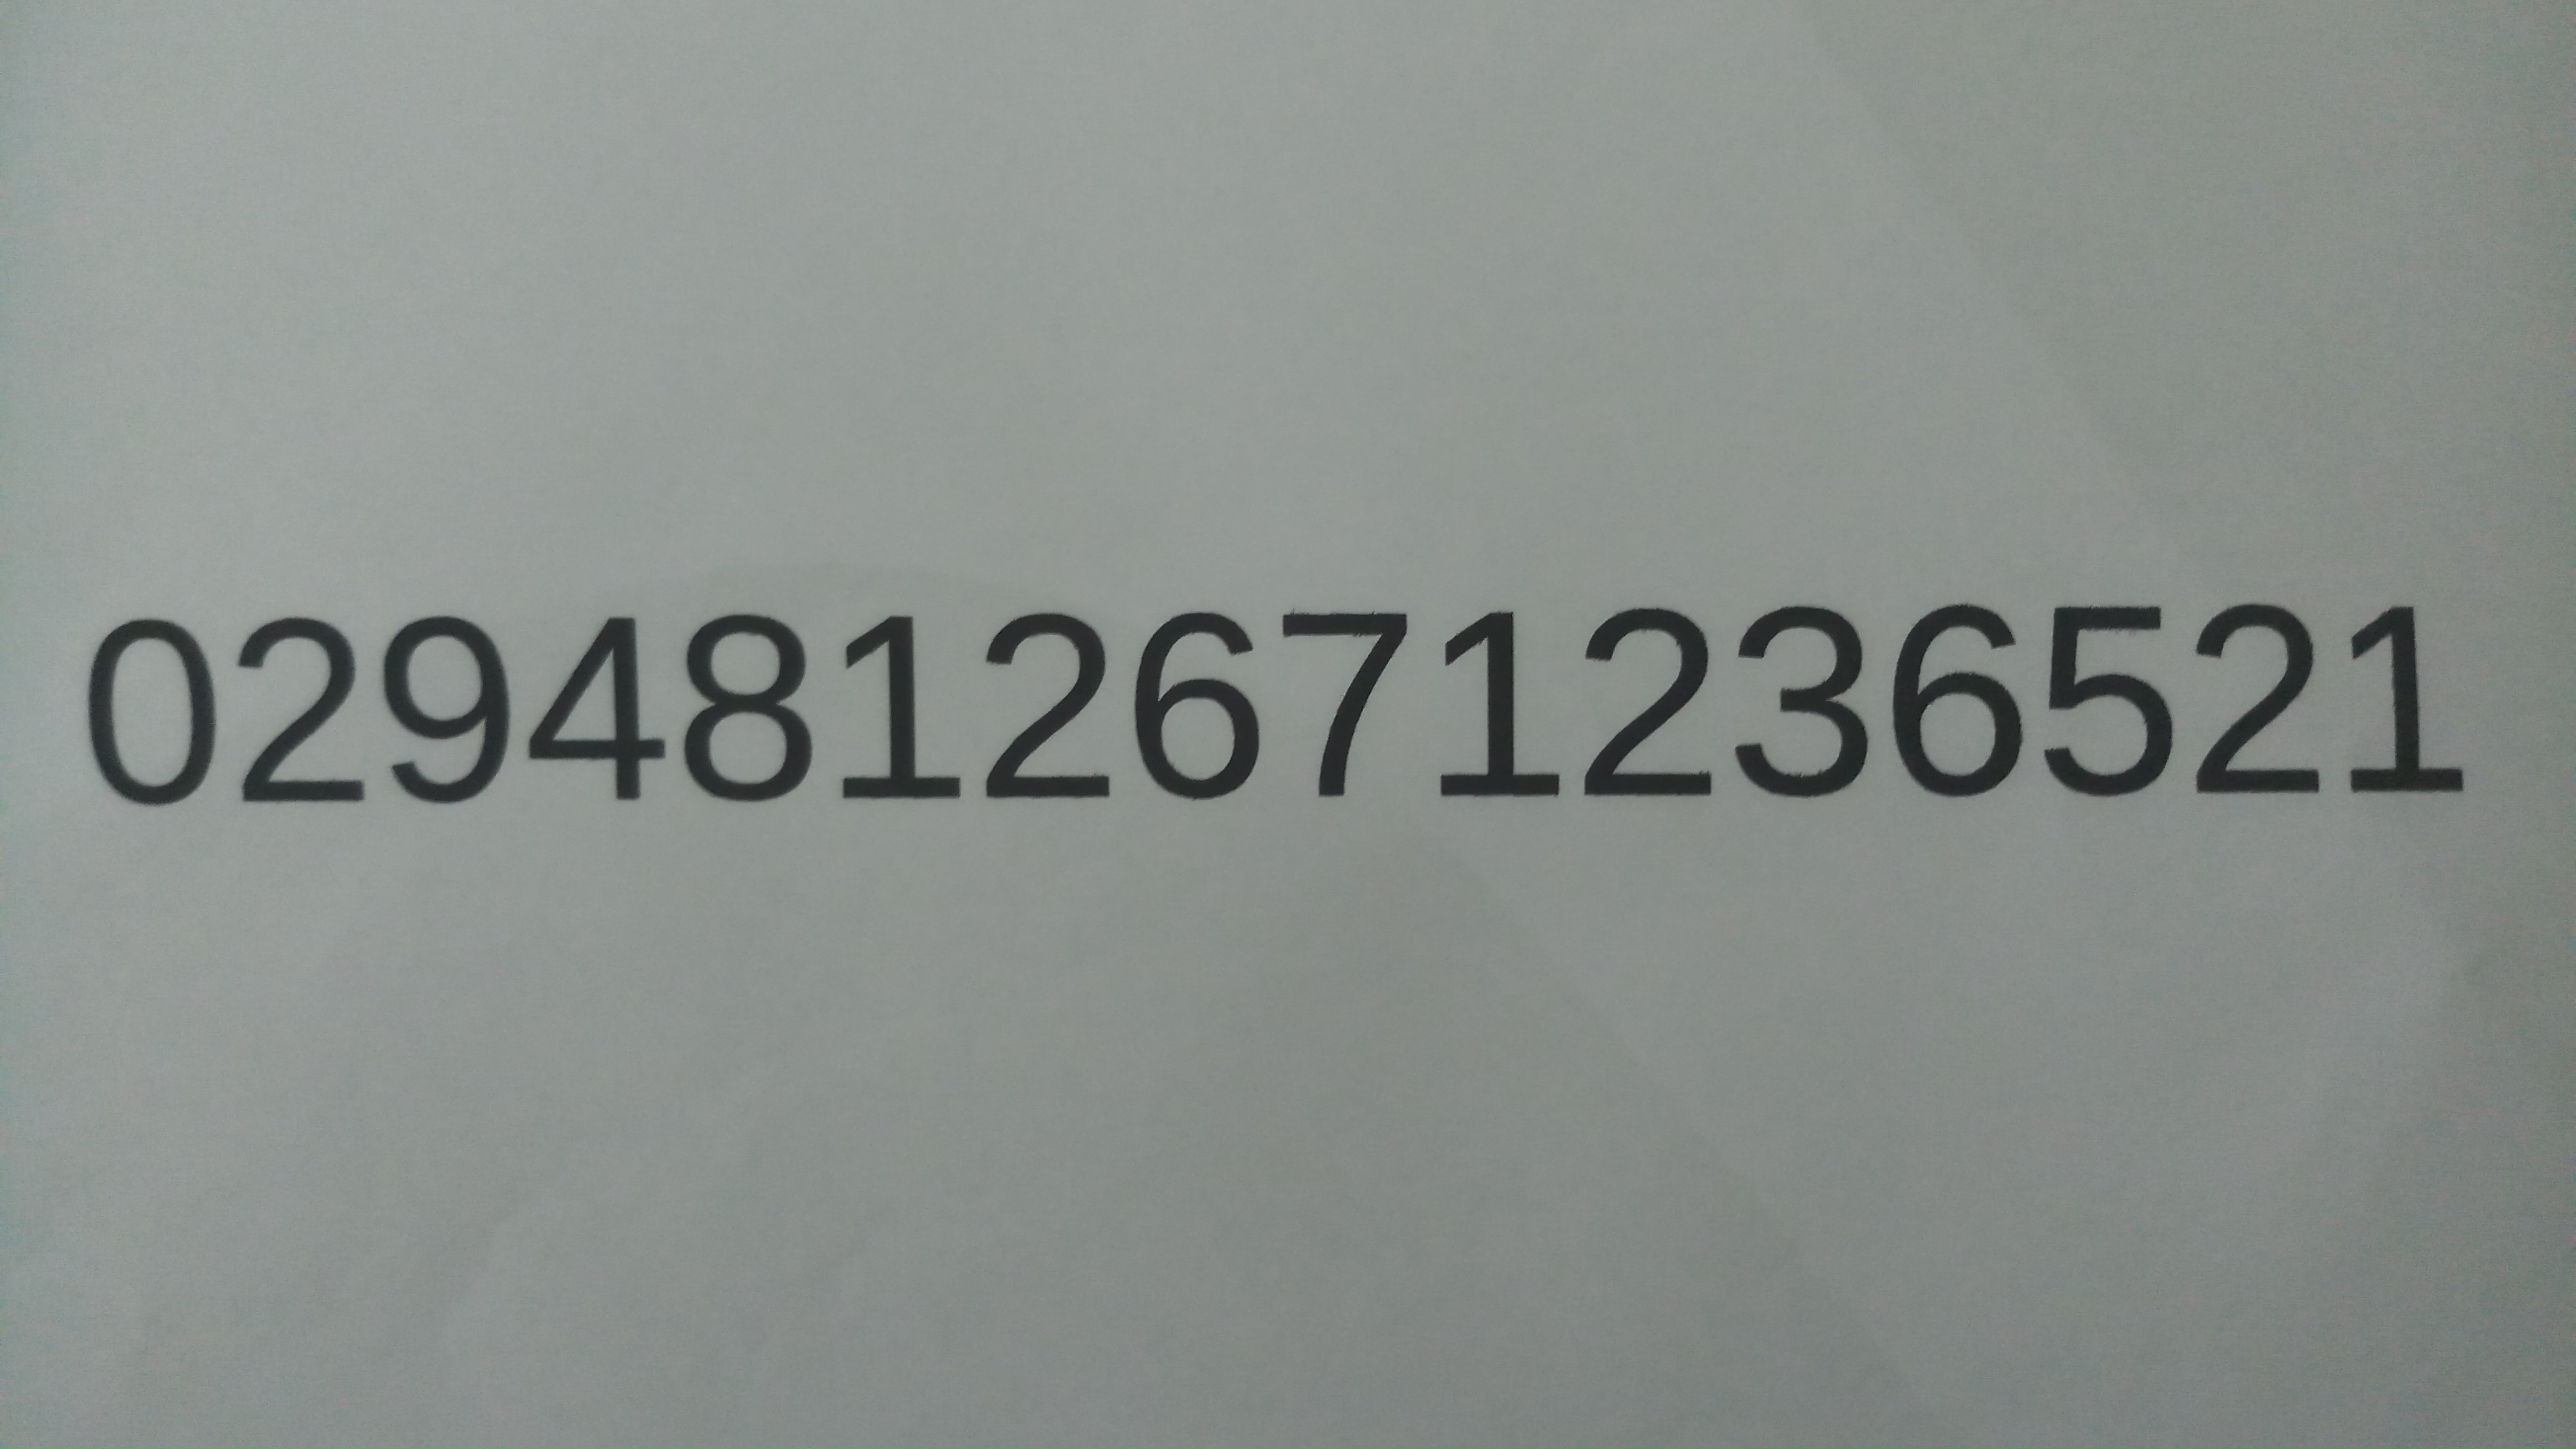

In [2]:
file_name = "input/angka.jpg"

input_image = Image.open(open(file_name, 'rb'))
input_image

In [17]:
# url = 'http://localhost:5000/blackwhite'
# files = {'media': open('bebek.jpg', 'rb')}
# response = requests.post(url, files=files)
# response.content

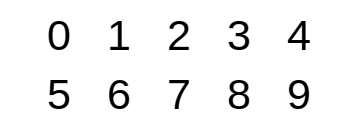

In [18]:
pixel_img = np.array(input_image)
pixel_gray = np.zeros(pixel_img.shape[0:2], pixel_img.dtype)
for i, row in enumerate(pixel_img):
    for j, pix in enumerate(row):
        pixel_gray[i][j] = np.uint8(pix[:3].mean())
        
Image.fromarray(pixel_gray)

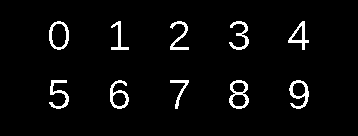

In [19]:
threshold = 63

pixel_bw = np.zeros(pixel_gray.shape[0:2], pixel_gray.dtype)
for i, row in enumerate(pixel_gray):
    for j, pix in enumerate(row):
        if pixel_gray[i][j] < threshold:
            pixel_bw[i][j] = 255
        else:
            pixel_bw[i][j] = 0

Image.fromarray(pixel_bw)

In [20]:
pixel_visited = np.zeros(pixel_bw.shape[0:2], bool)

def antiflood(i, j, matrix_bw, matrix_visited):
    q = Queue()
    q.put((i,j))
    matrix_visited[i][j] = True
    cluster_size = 0
    upper_left_point = (i,j)
    lower_right_point = (i,j)
    while not q.empty():
        current = q.get()
        if current[0] > lower_right_point[0]:
            lower_right_point = (current[0], lower_right_point[1])
        if current[1] < upper_left_point[1]:
            upper_left_point = (upper_left_point[0], current[1])
        elif current[1] > lower_right_point[1]:
            lower_right_point = (lower_right_point[0], current[1])
        cluster_size += 1
        if (current[0]-1 >= 0) and matrix_bw[current[0]-1][current[1]] == 255 and not matrix_visited[current[0]-1][current[1]]:
            q.put((current[0]-1, current[1]))
            matrix_visited[current[0]-1][current[1]] = True
        if (current[0]+1 < pixel_visited.shape[0]) and matrix_bw[current[0]+1][current[1]] == 255 and not matrix_visited[current[0]+1][current[1]]:
            q.put((current[0]+1, current[1]))
            matrix_visited[current[0]+1][current[1]] = True
        if (current[1]-1 >= 0) and matrix_bw[current[0]][current[1]-1] == 255 and not matrix_visited[current[0]][current[1]-1]:
            q.put((current[0], current[1]-1))
            matrix_visited[current[0]][current[1]-1] = True
        if (current[1]+1 < pixel_visited.shape[1]) and matrix_bw[current[0]][current[1]+1] == 255 and not matrix_visited[current[0]][current[1]+1]:
            q.put((current[0], current[1]+1))
            matrix_visited[current[0]][current[1]+1] = True
    return matrix_visited, cluster_size, upper_left_point, lower_right_point

size_threshold = 64
cluster_pivots = []
for i, row in enumerate(pixel_bw):
    for j, pix in enumerate(row):
        if pix == 255 and not pixel_visited[i][j]:
            pixel_visited, cluster_size, upper_left_point, lower_right_point = antiflood(i, j, pixel_bw, pixel_visited)
            if cluster_size > size_threshold:
                cluster_pivots.append({'pivot' : (i,j), 'size' : cluster_size, 'ul' : upper_left_point, 'lr' : lower_right_point})
print(cluster_pivots)

[{'pivot': (21, 57), 'size': 202, 'ul': (21, 49), 'lr': (49, 68)}, {'pivot': (21, 118), 'size': 152, 'ul': (21, 111), 'lr': (49, 128)}, {'pivot': (21, 177), 'size': 186, 'ul': (21, 170), 'lr': (49, 188)}, {'pivot': (21, 236), 'size': 198, 'ul': (21, 229), 'lr': (49, 248)}, {'pivot': (21, 302), 'size': 191, 'ul': (21, 288), 'lr': (49, 308)}, {'pivot': (80, 51), 'size': 214, 'ul': (80, 49), 'lr': (108, 68)}, {'pivot': (80, 118), 'size': 214, 'ul': (80, 110), 'lr': (108, 128)}, {'pivot': (80, 170), 'size': 137, 'ul': (80, 170), 'lr': (108, 188)}, {'pivot': (80, 236), 'size': 241, 'ul': (80, 229), 'lr': (108, 248)}, {'pivot': (80, 296), 'size': 229, 'ul': (80, 289), 'lr': (108, 308)}]


In [21]:
"""
Directions:

701
6x2
543

"""

for i, pivot in enumerate(cluster_pivots):
    direction_count = np.zeros(8, dtype='uint32')
    current_direction = 0
    direction_count[0] += 1
    current_pivot = pivot['pivot']
    start = False
    while not start or not (current_pivot[0] == pivot['pivot'][0] and current_pivot[1] == pivot['pivot'][1]):
        start = True
        if current_direction == 0:
            if pixel_bw[current_pivot[0]-1][current_pivot[1]+1] == 255:
                current_pivot = (current_pivot[0]-1, current_pivot[1]+1)
                current_direction = 6
                direction_count[6] += 1
                direction_count[7] += 1
            elif pixel_bw[current_pivot[0]][current_pivot[1]+1] == 255:
                current_pivot = (current_pivot[0], current_pivot[1]+1)
                direction_count[0] += 1
            else:
                current_direction = 2
                direction_count[1] += 1
                direction_count[2] += 1
        elif current_direction == 2:
            if pixel_bw[current_pivot[0]+1][current_pivot[1]+1] == 255:
                current_pivot = (current_pivot[0]+1, current_pivot[1]+1)
                current_direction = 0
                direction_count[0] += 1
                direction_count[1] += 1
            elif pixel_bw[current_pivot[0]+1][current_pivot[1]] == 255:
                current_pivot = (current_pivot[0]+1, current_pivot[1])
                direction_count[2] += 1
            else:
                current_direction = 4
                direction_count[3] += 1
                direction_count[4] += 1
        elif current_direction == 4:
            if pixel_bw[current_pivot[0]+1][current_pivot[1]-1] == 255:
                current_pivot = (current_pivot[0]+1, current_pivot[1]-1)
                current_direction = 2
                direction_count[2] += 1
                direction_count[3] += 1
            elif pixel_bw[current_pivot[0]][current_pivot[1]-1] == 255:
                current_pivot = (current_pivot[0], current_pivot[1]-1)
                direction_count[4] += 1
            else:
                current_direction = 6
                direction_count[5] += 1
                direction_count[6] += 1
        else:
            if pixel_bw[current_pivot[0]-1][current_pivot[1]-1] == 255:
                current_pivot = (current_pivot[0]-1, current_pivot[1]-1)
                current_direction = 4
                direction_count[4] += 1
                direction_count[5] += 1
            elif pixel_bw[current_pivot[0]-1][current_pivot[1]] == 255:
                current_pivot = (current_pivot[0]-1, current_pivot[1])
                direction_count[6] += 1
            else:
                current_direction = 0
                direction_count[7] += 1
                direction_count[0] += 1
    cluster_pivots[i]['chains'] = direction_count

print(cluster_pivots)
    

[{'pivot': (21, 57), 'size': 202, 'ul': (21, 49), 'lr': (49, 68), 'chains': array([20, 13, 29, 13, 20, 13, 29, 12], dtype=uint32)}, {'pivot': (21, 118), 'size': 152, 'ul': (21, 111), 'lr': (49, 128), 'chains': array([25,  3, 32,  7, 25,  3, 32, 12], dtype=uint32)}, {'pivot': (21, 177), 'size': 186, 'ul': (21, 170), 'lr': (49, 188), 'chains': array([49, 11, 34, 35, 49,  9, 34, 36], dtype=uint32)}, {'pivot': (21, 236), 'size': 198, 'ul': (21, 229), 'lr': (49, 248), 'chains': array([50, 25, 38, 25, 50, 23, 38, 22], dtype=uint32)}, {'pivot': (21, 302), 'size': 191, 'ul': (21, 288), 'lr': (49, 308), 'chains': array([21,  3, 29,  3, 21,  3, 29, 28], dtype=uint32)}, {'pivot': (80, 51), 'size': 214, 'ul': (80, 49), 'lr': (108, 68), 'chains': array([50, 19, 37, 19, 50, 17, 37, 16], dtype=uint32)}, {'pivot': (80, 118), 'size': 214, 'ul': (80, 110), 'lr': (108, 128), 'chains': array([33, 19, 35, 19, 33, 17, 35, 18], dtype=uint32)}, {'pivot': (80, 170), 'size': 137, 'ul': (80, 170), 'lr': (108, 18

In [22]:
for i, cluster in enumerate(cluster_pivots):
    print(cluster)

{'pivot': (21, 57), 'size': 202, 'ul': (21, 49), 'lr': (49, 68), 'chains': array([20, 13, 29, 13, 20, 13, 29, 12], dtype=uint32)}
{'pivot': (21, 118), 'size': 152, 'ul': (21, 111), 'lr': (49, 128), 'chains': array([25,  3, 32,  7, 25,  3, 32, 12], dtype=uint32)}
{'pivot': (21, 177), 'size': 186, 'ul': (21, 170), 'lr': (49, 188), 'chains': array([49, 11, 34, 35, 49,  9, 34, 36], dtype=uint32)}
{'pivot': (21, 236), 'size': 198, 'ul': (21, 229), 'lr': (49, 248), 'chains': array([50, 25, 38, 25, 50, 23, 38, 22], dtype=uint32)}
{'pivot': (21, 302), 'size': 191, 'ul': (21, 288), 'lr': (49, 308), 'chains': array([21,  3, 29,  3, 21,  3, 29, 28], dtype=uint32)}
{'pivot': (80, 51), 'size': 214, 'ul': (80, 49), 'lr': (108, 68), 'chains': array([50, 19, 37, 19, 50, 17, 37, 16], dtype=uint32)}
{'pivot': (80, 118), 'size': 214, 'ul': (80, 110), 'lr': (108, 128), 'chains': array([33, 19, 35, 19, 33, 17, 35, 18], dtype=uint32)}
{'pivot': (80, 170), 'size': 137, 'ul': (80, 170), 'lr': (108, 188), 'cha

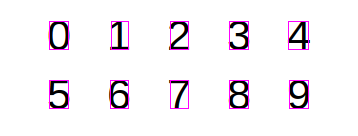

In [27]:
pixel_img_result = pixel_img.copy()

for i, cluster in enumerate(cluster_pivots):
    for j in range(cluster['ul'][0], cluster['lr'][0]+1):
        pixel_img_result[j][cluster['ul'][1]] = [255, 0, 255, 255]
        pixel_img_result[j][cluster['lr'][1]] = [255, 0, 255, 255]
    for j in range(cluster['ul'][1], cluster['lr'][1]+1):
        pixel_img_result[cluster['ul'][0]][j] = [255, 0, 255, 255]
        pixel_img_result[cluster['lr'][0]][j] = [255, 0, 255, 255]

Image.fromarray(pixel_img_result)

In [63]:
df = pd.DataFrame(data=cluster_pivots)
df

chains          lr      pivot  size         ul
0  [20, 13, 29, 13, 20, 13, 29, 12]    (49, 68)   (21, 57)   202   (21, 49)
1     [25, 3, 32, 7, 25, 3, 32, 12]   (49, 128)  (21, 118)   152  (21, 111)
2   [49, 11, 34, 35, 49, 9, 34, 36]   (49, 188)  (21, 177)   186  (21, 170)
3  [50, 25, 38, 25, 50, 23, 38, 22]   (49, 248)  (21, 236)   198  (21, 229)
4     [21, 3, 29, 3, 21, 3, 29, 28]   (49, 308)  (21, 302)   191  (21, 288)
5  [50, 19, 37, 19, 50, 17, 37, 16]   (108, 68)   (80, 51)   214   (80, 49)
6  [33, 19, 35, 19, 33, 17, 35, 18]  (108, 128)  (80, 118)   214  (80, 110)
7    [29, 1, 29, 23, 29, 3, 29, 20]  (108, 188)  (80, 170)   137  (80, 170)
8  [30, 17, 29, 19, 30, 19, 29, 16]  (108, 248)  (80, 236)   241  (80, 229)
9  [35, 19, 35, 19, 35, 21, 35, 18]  (108, 308)  (80, 296)   229  (80, 289)

In [64]:
# preprocessing 1 : expand
for i in range(8):
    df['chain_' + str(i)] = [v['chains'][i] for v in cluster_pivots]

df['height'] = np.subtract([v['lr'][0] for v in cluster_pivots], [v['ul'][0] for v in cluster_pivots])
df['width'] = np.subtract([v['lr'][1] for v in cluster_pivots], [v['ul'][1] for v in cluster_pivots])
    
df = df.drop(labels=['chains', 'pivot'], axis=1)

df

lr  size         ul  chain_0  chain_1  chain_2  chain_3  chain_4  \
0    (49, 68)   202   (21, 49)       20       13       29       13       20   
1   (49, 128)   152  (21, 111)       25        3       32        7       25   
2   (49, 188)   186  (21, 170)       49       11       34       35       49   
3   (49, 248)   198  (21, 229)       50       25       38       25       50   
4   (49, 308)   191  (21, 288)       21        3       29        3       21   
5   (108, 68)   214   (80, 49)       50       19       37       19       50   
6  (108, 128)   214  (80, 110)       33       19       35       19       33   
7  (108, 188)   137  (80, 170)       29        1       29       23       29   
8  (108, 248)   241  (80, 229)       30       17       29       19       30   
9  (108, 308)   229  (80, 289)       35       19       35       19       35   

   chain_5  chain_6  chain_7  height  width  
0       13       29       12      28     19  
1        3       32       12      28     17  
2        9       34       36      28     18  
3       23       38       22      28     19  
4        3       29       28      28     20  
5       17       37       16      28     19  
6       17       35       18      28     18  
7        3       29       20      28     18  
8       19       29       16      28     19  
9       21       35       18      28     19

In [65]:
# preprocessing 2 : ratio
df['area'] = np.multiply([v for v in df['height']], [v for v in df['width']])

df['size'] = np.multiply(10.0, np.divide([float(v) for v in df['size']], [float(v) for v in df['area']]))
for i in range(8):
    df['chain_' + str(i)] = np.multiply(100.0, np.divide([float(v) for v in df['chain_' + str(i)]], [float(v) for v in df['area']]))

df = df.drop(labels=['height', 'width', 'area', 'chain_4', 'chain_6'], axis=1)

df

lr      size         ul   chain_0   chain_1   chain_2   chain_3  \
0    (49, 68)  3.796992   (21, 49)  3.759398  2.443609  5.451128  2.443609   
1   (49, 128)  3.193277  (21, 111)  5.252101  0.630252  6.722689  1.470588   
2   (49, 188)  3.690476  (21, 170)  9.722222  2.182540  6.746032  6.944444   
3   (49, 248)  3.721805  (21, 229)  9.398496  4.699248  7.142857  4.699248   
4   (49, 308)  3.410714  (21, 288)  3.750000  0.535714  5.178571  0.535714   
5   (108, 68)  4.022556   (80, 49)  9.398496  3.571429  6.954887  3.571429   
6  (108, 128)  4.246032  (80, 110)  6.547619  3.769841  6.944444  3.769841   
7  (108, 188)  2.718254  (80, 170)  5.753968  0.198413  5.753968  4.563492   
8  (108, 248)  4.530075  (80, 229)  5.639098  3.195489  5.451128  3.571429   
9  (108, 308)  4.304511  (80, 289)  6.578947  3.571429  6.578947  3.571429   

    chain_5   chain_7  
0  2.443609  2.255639  
1  0.630252  2.521008  
2  1.785714  7.142857  
3  4.323308  4.135338  
4  0.535714  5.000000  
5  3.195489  3.007519  
6  3.373016  3.571429  
7  0.595238  3.968254  
8  3.571429  3.007519  
9  3.947368  3.383459